# Climate data analysis

In this demo, we will be investigating the **world's climate**. The data contains **gridded monthly air temperature and precipitation** for the 1959-2021 time period from the [Copernicus Climate Change Service](https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-single-levels-monthly-means?tab=overview). 

```{image} images/climate.jpeg
:width: 600px
:align: center
```

## `xarray`

* The best Python package for this task is `xarray` which introduces labels in the form of **dimensions, coordinates, and attributes** on top of raw NumPy-like arrays, a bit like `Pandas`. 


* `xarray` can be used read, write, and analyze any scientific datasets stored in `.nc` or `.hdf` format.


* Almost all climate data (and some remote sensing data) are stored in these formats.

```{image} images/xarray.png
:alt: xarray
:width: 500px
:align: center
```

In [1]:
# Import package
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Read data
xds = xr.open_dataset('data/world_climate.nc')

## Basic information about `Dataset`

In [2]:
type(xds)

xarray.core.dataset.Dataset

In [3]:
xds.dims

FrozenMappingWarningOnValuesAccess({'longitude': 1440, 'latitude': 721, 'time': 756})

In [4]:
xds.coords

Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2021-12-01

All information can be printed using the `keys()` function. 

In [5]:
xds.keys

<bound method Mapping.keys of <xarray.Dataset> Size: 13GB
Dimensions:    (longitude: 1440, latitude: 721, time: 756)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2021-12-01
Data variables:
    t2m        (time, latitude, longitude) float64 6GB ...
    mtpr       (time, latitude, longitude) float64 6GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-28 21:51:01 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...>

```{note}
`t2m` stands for 2 m above the surface, the standard height used by temperature sensors. It is a common metric used in climatology but note that it is different from the surface temperature which would be the temperature of the ground surface.
```

Since we are using an interactive notebook, a more convenient way of finding information about our dataset is to just execute the variable name.

In [6]:
xds

<xarray.Dataset> Size: 13GB
Dimensions:    (longitude: 1440, latitude: 721, time: 756)
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * time       (time) datetime64[ns] 6kB 1959-01-01 1959-02-01 ... 2021-12-01
Data variables:
    t2m        (time, latitude, longitude) float64 6GB ...
    mtpr       (time, latitude, longitude) float64 6GB ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-01-28 21:51:01 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

## Basic information about `DataArray`


In [7]:
type(xds['latitude'])

xarray.core.dataarray.DataArray

In [8]:
xds['latitude']

<xarray.DataArray 'latitude' (latitude: 721)> Size: 3kB
array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ],
      shape=(721,), dtype=float32)
Coordinates:
  * latitude  (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
Attributes:
    units:      degrees_north
    long_name:  latitude

Print as a NumPy array

In [9]:
type(xds['latitude'].values)

numpy.ndarray

First item in array

In [10]:
xds['latitude'].values[0]

np.float32(90.0)

Last item in array

In [11]:
xds['latitude'].values[-1]

np.float32(-90.0)

Shape of `DataArray`

In [12]:
xds['latitude'].values.shape

(721,)

## Time

In [13]:
type(xds['time'].values[0])

numpy.datetime64

In [14]:
period = xds['time'].values[-1] - xds['time'].values[0]
period

np.timedelta64(1985472000000000000,'ns')

In [15]:
period.astype('timedelta64[Y]')

np.timedelta64(62,'Y')

Convert to **integer**

In [16]:
period.astype('timedelta64[Y]').astype(int)

np.int64(62)

## Plot

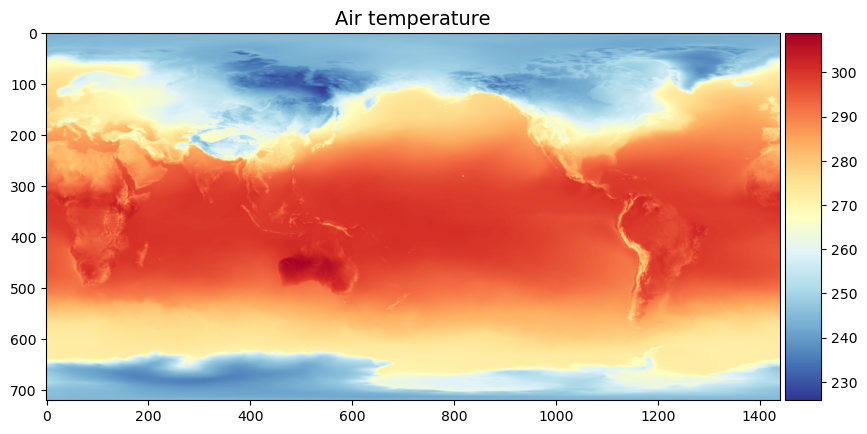

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

im1 = ax.imshow(xds['t2m'][0,:,:], cmap='RdYlBu_r')

ax.set_title("Air temperature", fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

## Stats

Compute mean air temperature for entire period

In [18]:
temp = xds['t2m']
mean_temp = temp.mean(['time'])
mean_temp

<xarray.DataArray 't2m' (latitude: 721, longitude: 1440)> Size: 8MB
array([[258.49005406, 258.49005406, 258.49005406, ..., 258.49005406,
        258.49005406, 258.49005406],
       [258.49639085, 258.49655877, 258.49666606, ..., 258.49590574,
        258.49609931, 258.49620893],
       [258.54803436, 258.54841452, 258.54879001, ..., 258.54686356,
        258.54714576, 258.54754691],
       ...,
       [228.08867964, 228.0895729 , 228.09131278, ..., 228.08614213,
        228.08758348, 228.08856303],
       [227.98272217, 227.98401892, 227.98524336, ..., 227.98061613,
        227.98129249, 227.98197351],
       [227.51711896, 227.51711896, 227.51711896, ..., 227.51711896,
        227.51711896, 227.51711896]], shape=(721, 1440))
Coordinates:
  * longitude  (longitude) float32 6kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
  * latitude   (latitude) float32 3kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0

In [19]:
mean_temp.shape

(721, 1440)

In [20]:
mean_temp[300, 100]

<xarray.DataArray 't2m' ()> Size: 8B
array(297.00346626)
Coordinates:
    longitude  float32 4B 25.0
    latitude   float32 4B 15.0

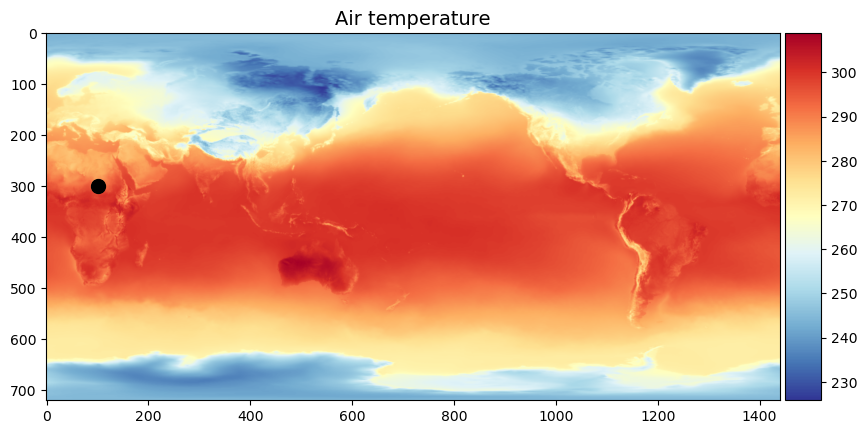

In [21]:
# Plot
fig, ax = plt.subplots(figsize=(10,6))

im1 = ax.imshow(xds['t2m'][0,:,:], cmap='RdYlBu_r')
ax.scatter(100, 300, s=100, c='k')

ax.set_title("Air temperature", fontsize=14)
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

## Indexing multi-dimensional datasets

Since our `xarray` dataset is **aware** of the latitude and longitude coordinates, we can index values conveniently.

In [22]:
t = xds['t2m'].sel(latitude=27.7, longitude=85.3, method='nearest')
print('The mean annual air temperature in Kathmandu is %.2f F' %((t.mean('time').values - 273.15) * 9/5 + 32))

The mean annual air temperature in Kathmandu is 62.49 F


Convert to Pandas `DataFrame`

In [23]:
t.to_dataframe()

,longitude,latitude,t2m
time,,,
1959-01-01,85.25,27.75,282.517155
1959-02-01,85.25,27.75,283.446361
1959-03-01,85.25,27.75,288.469712
1959-04-01,85.25,27.75,293.018762
1959-05-01,85.25,27.75,294.681458
...,...,...,...
2021-08-01,85.25,27.75,295.180443
2021-09-01,85.25,27.75,294.954754
2021-10-01,85.25,27.75,292.877707


## Where is the coldest place on Earth (1959-2021)?

To find the coldest place on Earth we have to find the grid cell with the lowest temperature. The `argmin()` function returns the **indices** of the minimum values of an array. 

In [24]:
min_value = mean_temp.argmin()
print(min_value)

<xarray.DataArray 't2m' ()> Size: 8B
array(978122)


Perhaps unexpectedly, `argmin()` returns a single number instead of a row/column pair. We can use NumPy's `unravel_index()` to convert this 1D index to 2D coordinates. It just needs to know the **shape** of our original 2D `DataArray`.

In [25]:
low_idx = np.unravel_index(min_value, mean_temp.shape)
print(low_idx)

(np.int64(679), np.int64(362))


In [26]:
cold = mean_temp[low_idx[0], low_idx[1]].values
print('Coldest place on Earth is %.2f F' % ((cold - 273.15) * 9/5 + 32))

Coldest place on Earth is -64.64 F


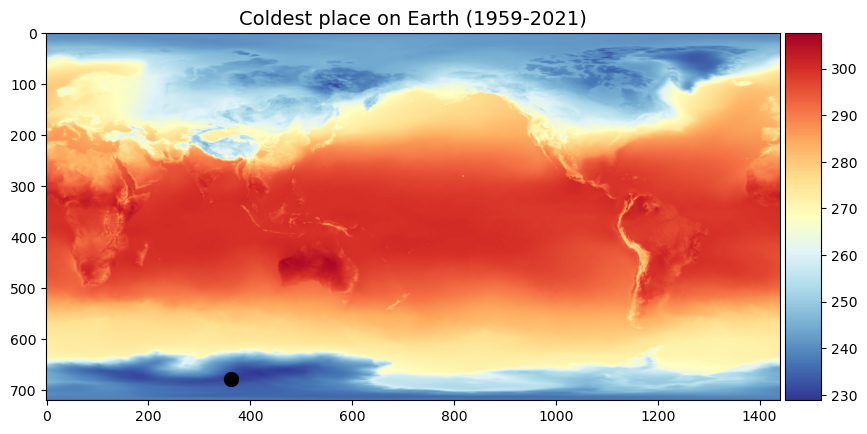

In [27]:
fig, ax1 = plt.subplots(figsize=(10,6))

im1 = ax1.imshow(xds['t2m'][1,:,:], cmap='RdYlBu_r')

ax1.set_title("Coldest place on Earth (1959-2021)", fontsize=14)
ax1.scatter(low_idx[1], low_idx[0], s=100, color='k')

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im1, cax=cax, orientation='vertical')

## Which was the hottest month on Earth (1959-2021)?

To find the hottest month on Earth, we need to preserve the time dimension of our data. Instead we need average over the latitude and longitude dimensions.  

In [28]:
hot = xds['t2m'].mean(['longitude','latitude'])

In [29]:
hot['time'][hot.argmax()].values

np.datetime64('2019-07-01T00:00:00.000000000')

Which was July 2019!!

## Which was the hottest year on Earth (1959-2021)?

There are a couple of ways to find the hottest year. The first is to use the `groupby` function. 

In [30]:
temp_yearly = xds['t2m'].groupby('time.year').mean()

In [31]:
hot = temp_yearly.mean(['longitude','latitude'])
hot['year'][hot.argmax()].values

array(2016)

```{note}
Since we grouped by **year**, the time interval dimension was renamed to `year`.
```

Alternatively, we could use the `resample` function. 

In [32]:
temp_yearly = xds['t2m'].resample(time="YE").mean()

In [33]:
hot = temp_yearly.mean(['longitude','latitude'])
hot['time'][hot.argmax()].values

np.datetime64('2016-12-31T00:00:00.000000000')